# Settings

In order to run the video to slides programm you need to make sure that following steps are done:

1. Download the video from zoom with the [chrome plugin](https://chrome.google.com/webstore/detail/zed-zoom-easy-downloader/pdadlkbckhinonakkfkdaadceojbekep?hl=en-GB)
2. Put the video in the `videos` folder in the root of the project
3. Specify the name of the video e.g. "00_tutorial_1662x1920.mp4"
4. Specify the name of the output slides e.g. "00_tutorial.png"
5. Run the notebook and enjoy!


In [1]:
video_path = "videos/00_tutorial.mp4"

# Import


In [2]:
from lib.utils import frame_generator, show_frame, slice_frame
from lib.encoder import ImageEncoder

model = ImageEncoder()

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Load Video


  2%|▏         | 2500/147135 [00:01<01:11, 2018.56it/s]


100


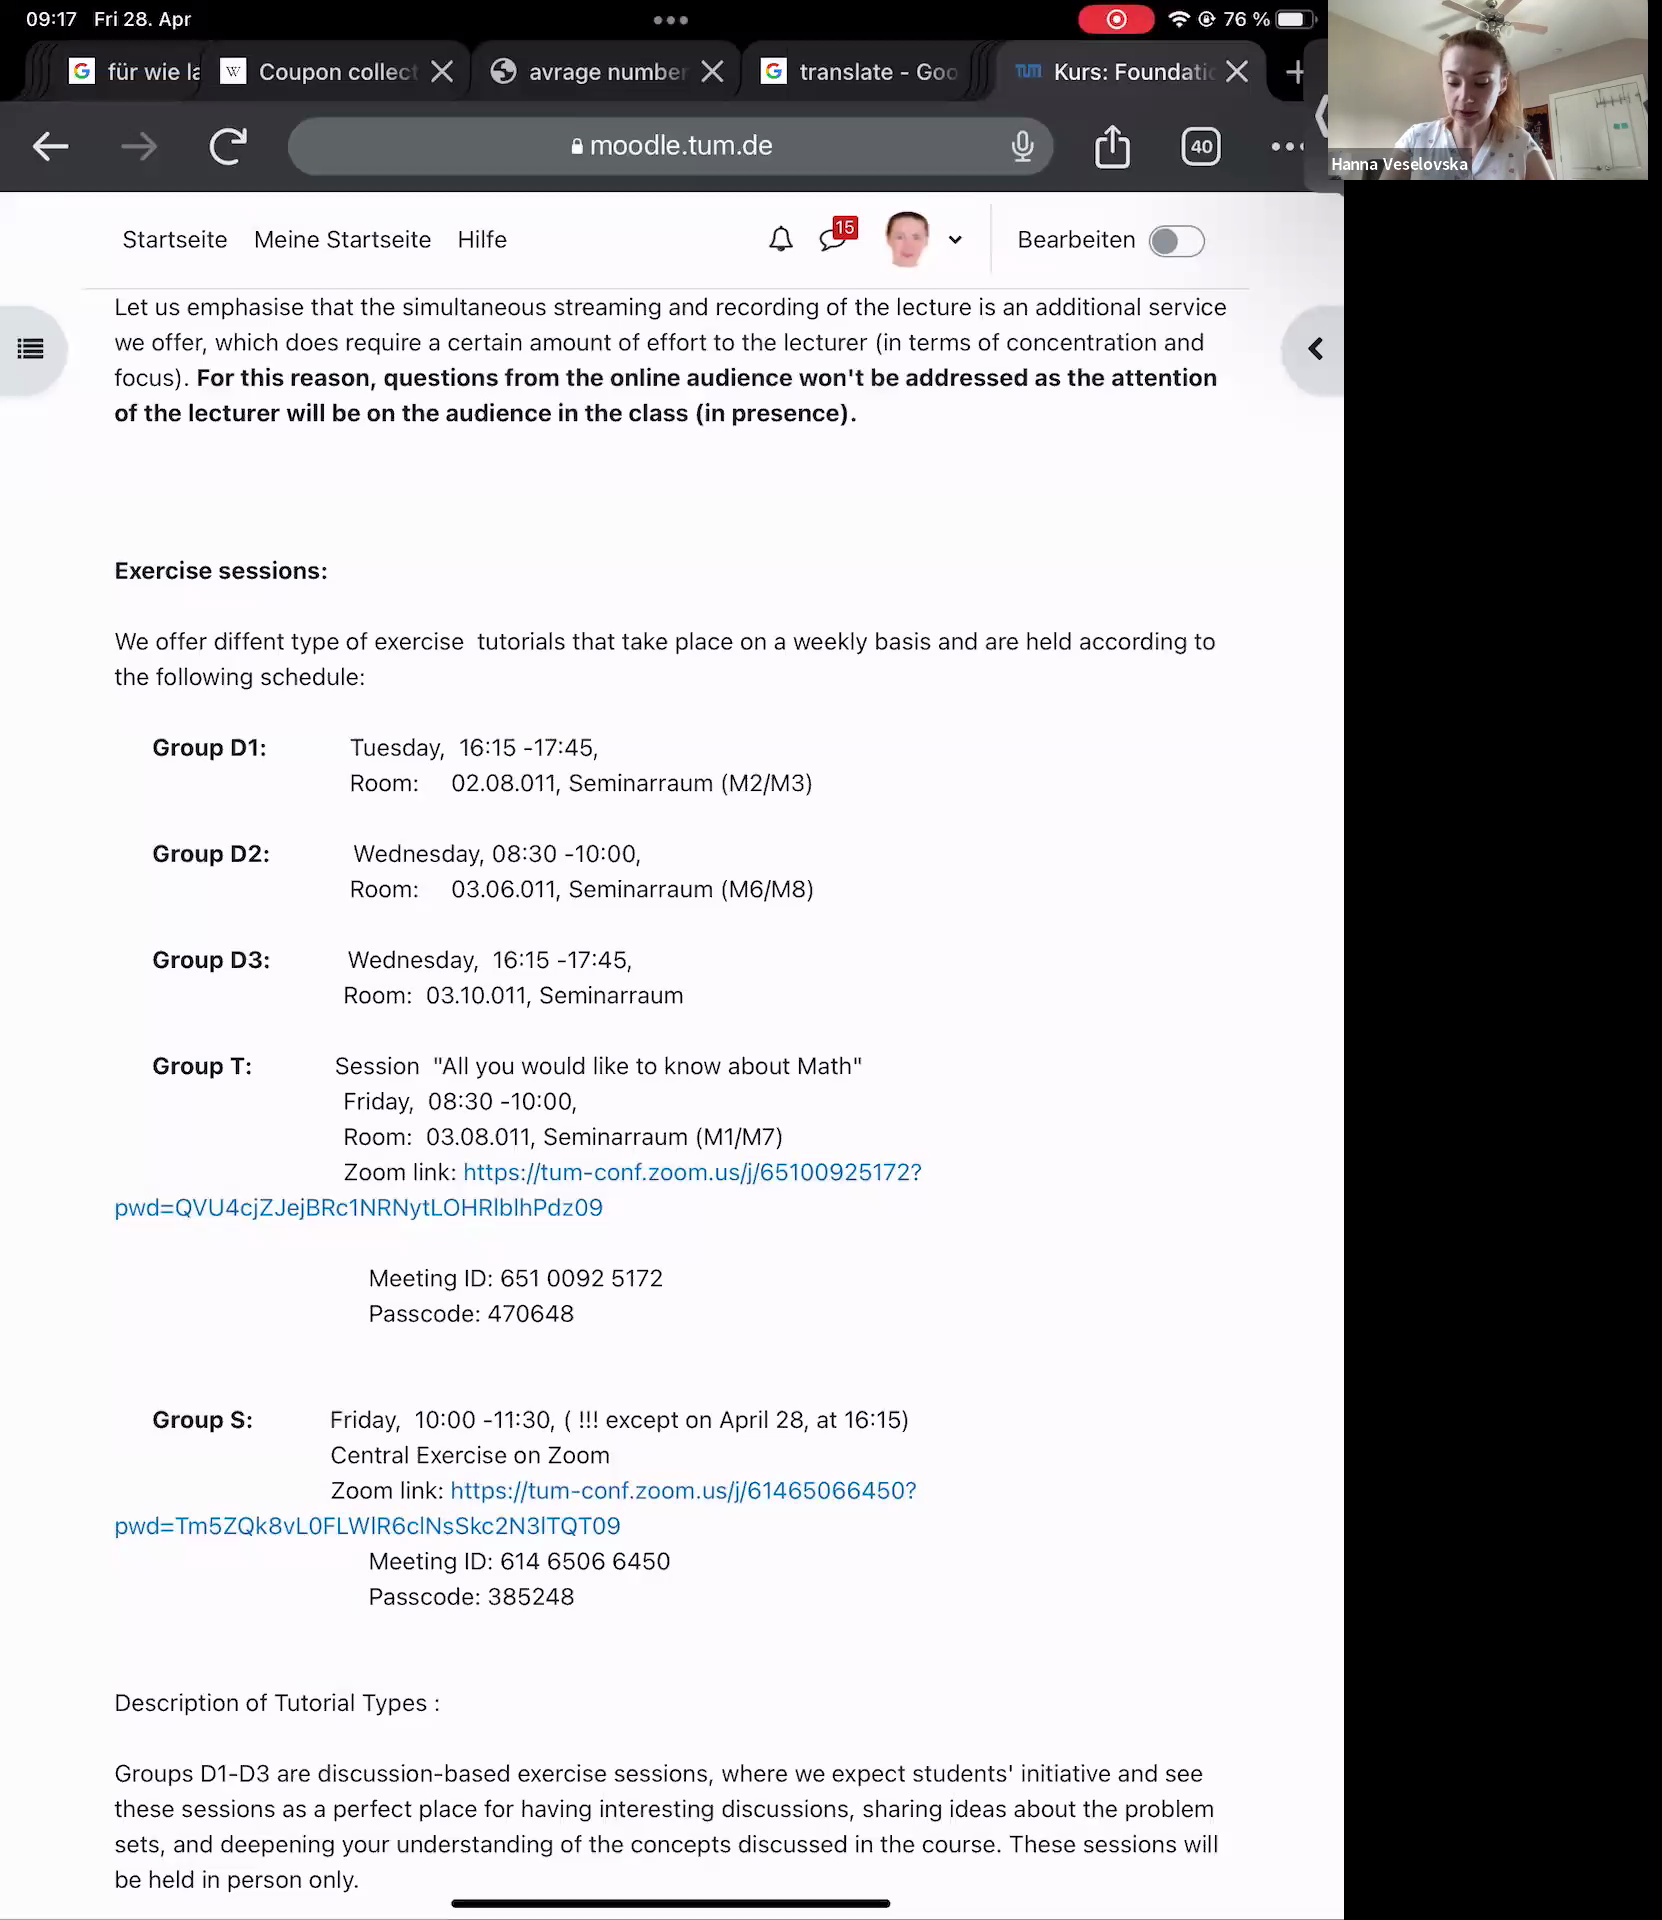

In [3]:
frames = list(
    frame_generator(
        video_path=video_path,
        max_frames=100,
    )
)
print(len(frames))
show_frame(frames[-1])

In [17]:
from torch.nn.functional import cosine_similarity

similarity_threshold = 0.95
max_frames=200

frames = []
embeddings = []
simmilarities = []
slides = []

frames_iter = iter(frame_generator(video_path, max_frames=max_frames))
frames.append(slice_frame(next(frames_iter)))
embeddings.append(model.encode(frames[0]))

for i, frame in enumerate(frames_iter, 1):
    # calc the new embedding
    frames.append(slice_frame(frame))
    embeddings.append(model.encode(frames[i]))
    simmilarities.append(cosine_similarity(embeddings[i-1], embeddings[i]))

    if simmilarities[i-1] < similarity_threshold:
        slides.append(frames[i-1])
slides.append(frames[i])

  3%|▎         | 5000/147135 [00:50<23:42, 99.95it/s] 


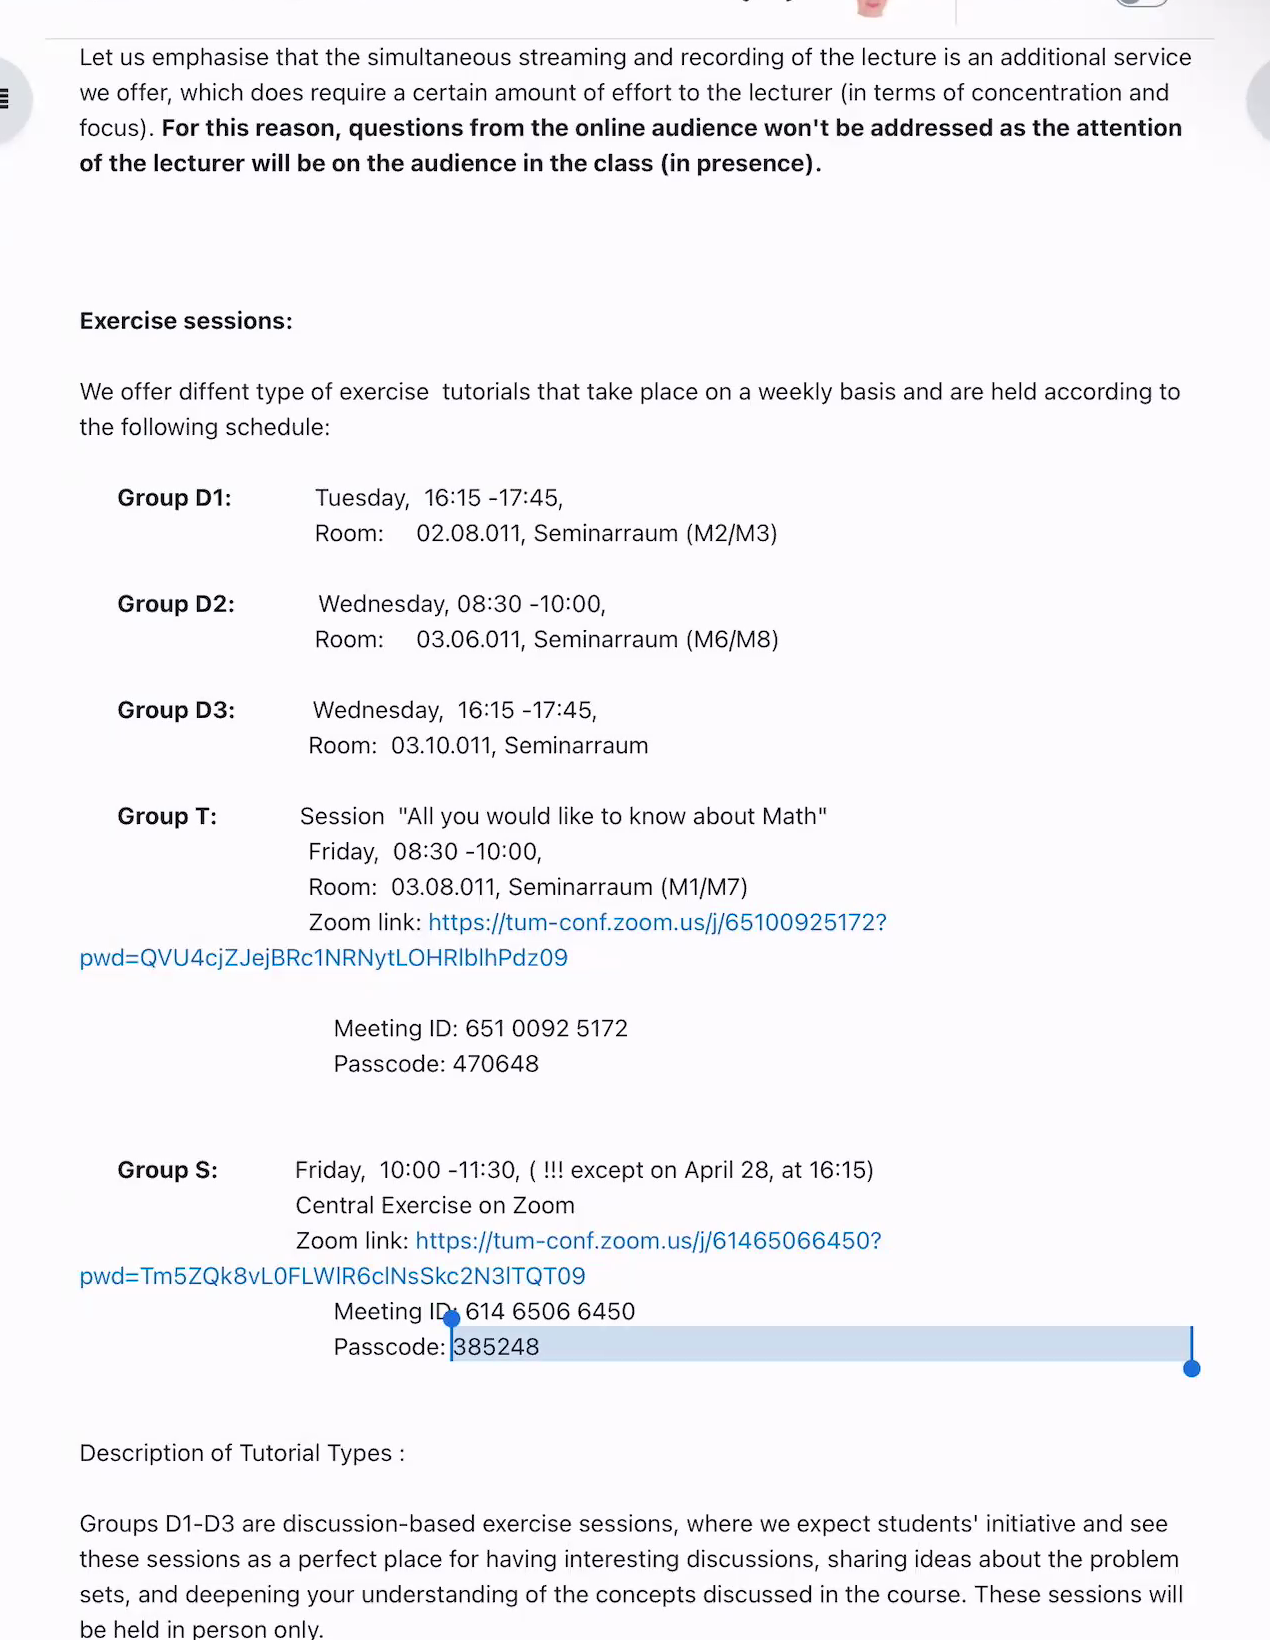

In [22]:
show_frame(slides[3])

In [5]:
l = [1, 2, 3, 4]
for i, li in enumerate(l, 1):
    print(i, li)

1 1
2 2
3 3
4 4


In [27]:
len(frames)

1001

In [46]:
for i, s in enumerate(sim):
    print(i, s)

0 tensor([0.9999], grad_fn=<SumBackward1>)
1 tensor([1.0000], grad_fn=<SumBackward1>)
2 tensor([0.9999], grad_fn=<SumBackward1>)
3 tensor([0.9999], grad_fn=<SumBackward1>)
4 tensor([0.9999], grad_fn=<SumBackward1>)
5 tensor([0.9999], grad_fn=<SumBackward1>)
6 tensor([1.0000], grad_fn=<SumBackward1>)
7 tensor([1.0000], grad_fn=<SumBackward1>)
8 tensor([1.0000], grad_fn=<SumBackward1>)
9 tensor([0.9999], grad_fn=<SumBackward1>)
10 tensor([0.9999], grad_fn=<SumBackward1>)
11 tensor([0.9998], grad_fn=<SumBackward1>)
12 tensor([0.9997], grad_fn=<SumBackward1>)
13 tensor([1.0000], grad_fn=<SumBackward1>)
14 tensor([0.9999], grad_fn=<SumBackward1>)
15 tensor([0.9999], grad_fn=<SumBackward1>)
16 tensor([0.9997], grad_fn=<SumBackward1>)
17 tensor([1.0000], grad_fn=<SumBackward1>)
18 tensor([0.9998], grad_fn=<SumBackward1>)
19 tensor([1.0000], grad_fn=<SumBackward1>)
20 tensor([0.8211], grad_fn=<SumBackward1>)
21 tensor([0.9997], grad_fn=<SumBackward1>)
22 tensor([0.9986], grad_fn=<SumBackward1>